In [3]:
import nltk
import pandas as pd
import re
from collections import Counter
import time
import PyDictionary

### Read the Reviews csv file

In [3]:
df=pd.read_csv('AmazonLawnAndGardenReviews.csv',encoding='iso-8859-1')

### Functions for Preprocessing of Text

In [4]:
def Remove_URLs(x):
    x = x.split(' ')
    x = [i for i in x if not len(re.findall(r'[\w\.-]+@[\w\.-]+',i))]
    x = ' '.join(x)
    return x
def tokenizing(x):
    return nltk.tokenize.word_tokenize(x)
def stopwords(x):
    stop_words=nltk.corpus.stopwords.words('english')
    x=[i for i in x if i not in stop_words]
    return x
def Lemmatization(x):
    lemmatizer=nltk.stem.WordNetLemmatizer()
    x = [ lemmatizer.lemmatize(i) for i in x]
    return x
def Remove_numbers(x):
    x = [re.sub('[^A-Z,a-z]+','',i) for i in x]
    x = ' '.join(x).lower()
    return x

   

In [5]:
x = df.reviewText
Remove_numbers(tokenizing(x[0]))

'good usa company that stands behind their products  i have had to warranty two hoses and they send replacements right out to you  i had one burst after awhile , you could see it buldge for weeks before it went so no suprises  the other one was winter related as i am bad and leave them out most of the time  highly reccomend  note the hundred footer is heavy and like wresting an anaconda when its time to put away , but it does have a far reach '

In [6]:
def preprocess(x):

    x = Remove_URLs(x)
    x = tokenizing(x)
    x = stopwords(x)
    x = Lemmatization(x)
    x = Remove_numbers(x)
    return x

Text before preprocessing

In [7]:
x=list(df.reviewText)
df.reviewText[0]

'Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.'

Example Preprcessed Text

In [8]:
preprocess(df.reviewText[0])

'good usa company stand behind product  i warranty two hose send replacement right  i one burst awhile , could see buldge week went suprises  the one winter related i bad leave time  highly reccomend  note hundred footer heavy like wresting anaconda time put away , far reach '

Preprocessing the whole Text of Reviews

In [8]:
t1 = time.time()
df['Preprocess_Review'] =  df.reviewText.apply(lambda x: preprocess(x) if isinstance(x,str) else ' ')
time.time() - t1

123.7751042842865

Extracting feature words from the reviews Text

In [13]:
t1 = time.time()
Word_dict = set()
for i in df.Preprocess_Review:
    Word_dict |= set(nltk.tokenize.word_tokenize(i))
time.time()-t1

22.777063131332397

### Tagging the text with the Parts of speech to differentiate the Words and to create features to words

In [57]:
Word_tags = pd.DataFrame(nltk.pos_tag(list(Word_dict)))

The parts of speech abbrevations to consider

In [58]:
Word_tags[1].unique()

array(['NNS', 'RB', 'VBP', 'JJ', 'NN', 'VBD', 'VBG', 'VBN', 'IN', 'VB',
       'WP', 'JJS', 'VBZ', 'RBR', 'FW', 'CD', 'JJR', 'RP', 'WDT', 'NNP',
       'PRP$', 'WRB', 'MD', 'CC', 'DT', 'PRP', 'RBS', 'PDT', 'EX', 'WP$',
       'UH', ',', 'TO'], dtype=object)


    CC | Coordinating conjunction |
    CD | Cardinal number |
    DT | Determiner |
    EX | Existential there |
    FW | Foreign word |
    IN | Preposition or subordinating conjunction |
    JJ | Adjective |
    JJR | Adjective, comparative |
    JJS | Adjective, superlative |
    LS | List item marker |
    MD | Modal |
    NN | Noun, singular or mass |
    NNS | Noun, plural |
    NNP | Proper noun, singular |
    NNPS | Proper noun, plural |
    PDT | Predeterminer |
    POS | Possessive ending |
    PRP | Personal pronoun |
    PRP$ | Possessive pronoun |
    RB | Adverb |
    RBR | Adverb, comparative |
    RBS | Adverb, superlative |
    RP | Particle |
    SYM | Symbol |
    TO | to |
    UH | Interjection |
    VB | Verb, base form |
    VBD | Verb, past tense |
    VBG | Verb, gerund or present participle |
    VBN | Verb, past participle |
    VBP | Verb, non-3rd person singular present |
    VBZ | Verb, 3rd person singular present |
    WDT | Wh-determiner |
    WP | Wh-pronoun |
    WP$ | Possessive wh-pronoun |
    WRB | Wh-adverb |


Extracting the words which gives meaning out of sentence (verbs)

In [64]:
Words_verbs = Word_tags[Word_tags[1].isin(['VB','VBP','VBN','VBZ','RB'])]

In [66]:
df.Preprocess_Review[0]

'good usa company stand behind product  i warranty two hose send replacement right  i one burst awhile , could see buldge week went suprises  the one winter related i bad leave time  highly reccomend  note hundred footer heavy like wresting anaconda time put away , far reach '

In [70]:
[i for i in nltk.pos_tag(nltk.tokenize.word_tokenize(df.Preprocess_Review[0])) if i[1] in ['VB','VBP','VBZ','RB','VBN']]

[('warranty', 'VBP'),
 ('send', 'VBP'),
 ('see', 'VB'),
 ('suprises', 'VBZ'),
 ('related', 'VBN'),
 ('leave', 'VBP'),
 ('highly', 'RB'),
 ('footer', 'RB'),
 ('away', 'RB'),
 ('far', 'RB')]

Creating seperate column of preprocess Verbs of each review Sentence

In [74]:
t1 = time.time()
def func(x):
    tokens = nltk.pos_tag(nltk.tokenize.word_tokenize(x))
    verbs = [i for i in tokens if i[1] in ['VB','VBP','VBZ','RB','VBN']]
    return verbs
df['Verbs'] = df.Preprocess_Review.apply(lambda x : func(x))
time.time()-t1

271.7537441253662

Word categories to differentiate Nouns and Pronouns

In [53]:
nltk.corpus.brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [52]:
nltk.corpus.brown.words(categories='adventure')

['Dan', 'Morgan', 'told', 'himself', 'he', 'would', ...]

## Regular Expressions in Preprocessing Raw Text 

In [9]:
x[0]

'Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.'

Extracting all occurances of Required word <B> "out" </B> in Raw Text

In [9]:
re.findall(r'[o][u][t]',x[0])

['out', 'out']

Extracting all <B> Integers </B> of Raw Text

In [61]:
w = x[0]+'98.4   34   4343  32.33 343.0'
re.findall(r'\d+.\d+',w)

['98.4', '4343', '32.33', '343.0']

Extracting all words which are ending with <B> 'ge' </B> in retrieving in <B> Contineous verbs</B>

In [26]:
[w for w in nltk.tokenize.word_tokenize(x[0]) if re.search(r'ge$',w)]

['buldge']

Lambda function in converting all words to <B> lower case</B>

In [98]:
list(map(lambda x: x.lower(),wordlist))

['i',
 'probably',
 'should',
 'have',
 'bought',
 'something',
 'a',
 'bit',
 'more',
 'flexible',
 'and',
 'less',
 'rugged',
 'since',
 'i',
 'constantly',
 'coil/uncoil',
 'it',
 'for',
 'washing',
 'cars',
 ',',
 'but',
 'that',
 "'s",
 'my',
 'fault',
 'not',
 'a',
 'product',
 'fault',
 '.']

In [95]:
x[0]

'Good USA company that stands behind their products. I have had to warranty two hoses and they send replacements right out to you. I had one burst after awhile, you could see it buldge for weeks before it went so no suprises. The other one was winter related as I am bad and leave them out most of the time. Highly reccomend. Note the hundred footer is heavy and like wresting an anaconda when its time to put away, but it does have a far reach.'

Extracting all words of raw text which are in <B> length of 5 to 7 </B>

In [11]:
[w for w in nltk.tokenize.word_tokenize(w) if re.search(r'\w{5,7}$', w)]

['company',
 'stands',
 'behind',
 'their',
 'products',
 'warranty',
 'hoses',
 'replacements',
 'right',
 'burst',
 'after',
 'awhile',
 'could',
 'buldge',
 'weeks',
 'before',
 'suprises',
 'other',
 'winter',
 'related',
 'leave',
 'Highly',
 'reccomend',
 'hundred',
 'footer',
 'heavy',
 'wresting',
 'anaconda']

Extracting of all words which are in <B> length of 5 </B>

In [84]:
[w for w in nltk.tokenize.word_tokenize(w) if re.search(r'^[a-zA-F]{5}$', w)]

['their',
 'hoses',
 'right',
 'burst',
 'after',
 'could',
 'weeks',
 'other',
 'leave',
 'heavy']

<B> Finding all occurances </B> of given word in raw text

In [14]:
re.findall(r'[o][u][t]',x[0])

['out', 'out']

Extracting all words which are <b>Greater than length 3 </b>

In [50]:
wordlist = nltk.tokenize.word_tokenize(x[3])
[w for w in wordlist if re.search('^[a-z]{3,}$', w)]

['probably',
 'should',
 'have',
 'bought',
 'something',
 'bit',
 'more',
 'flexible',
 'and',
 'less',
 'rugged',
 'since',
 'constantly',
 'for',
 'washing',
 'cars',
 'but',
 'that',
 'fault',
 'not',
 'product',
 'fault']

Extracting all the <b> Float values </b> of Raw text

In [12]:
re.findall('\d+\.\d+', w)

['98.4', '32.33', '343.0']

In [25]:
re.search(r'[i][t]+',w)

<_sre.SRE_Match object; span=(0, 2), match='it'>

Searching for the all the required <B>combinations of words</B> which are with <B> ghi- 1st letter,mno-2nd letter,jlk-3rd letter,def-4th letter </b>

In [18]:
[w for w in nltk.tokenize.word_tokenize(x[0]) if re.search('^[ghi][mno][jlk][def]$', w)]

[]

#### Importing the words from NLTK repository of Corpus
the words are tagged with one hot encoding

In [3]:
import nltk
a=nltk.corpus.brown.tagged_words(categories='news')[:15]

In [13]:
fd = nltk.FreqDist(nltk.corpus.brown.words(categories='news'))
fd.most_common(5)

[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146)]

Conditional FreqDist to visualize the words of having <B> specified length condition</B>

In [52]:
fd = nltk.ConditionalFreqDist(nltk.corpus.brown.words(categories='news'))
d =nltk.ConditionalFreqDist(nltk.pos_tag(nltk.tokenize.word_tokenize(x[0])))
d.items()


dict_items([('Good', FreqDist({'JJ': 1})), ('USA', FreqDist({'NNP': 1})), ('company', FreqDist({'NN': 1})), ('that', FreqDist({'WDT': 1})), ('stands', FreqDist({'VBZ': 1})), ('behind', FreqDist({'IN': 1})), ('their', FreqDist({'PRP$': 1})), ('products', FreqDist({'NNS': 1})), ('.', FreqDist({'.': 6})), ('I', FreqDist({'PRP': 3})), ('have', FreqDist({'VBP': 1, 'VB': 1})), ('had', FreqDist({'VBN': 1, 'VBD': 1})), ('to', FreqDist({'TO': 3})), ('warranty', FreqDist({'VB': 1})), ('two', FreqDist({'CD': 1})), ('hoses', FreqDist({'NNS': 1})), ('and', FreqDist({'CC': 3})), ('they', FreqDist({'PRP': 1})), ('send', FreqDist({'VBP': 1})), ('replacements', FreqDist({'NNS': 1})), ('right', FreqDist({'RB': 1})), ('out', FreqDist({'IN': 1, 'RP': 1})), ('you', FreqDist({'PRP': 2})), ('one', FreqDist({'CD': 1, 'NN': 1})), ('burst', FreqDist({'NN': 1})), ('after', FreqDist({'IN': 1})), ('awhile', FreqDist({'NN': 1})), (',', FreqDist({',': 2})), ('could', FreqDist({'MD': 1})), ('see', FreqDist({'VB': 1})

In [39]:
type(d.tabulate())

                ,    .   CC   CD   DT   IN   JJ  JJS   MD   NN  NNP  NNS  PRP PRP$   RB   RP   TO   VB  VBD  VBG  VBN  VBP  VBZ  WDT  WRB 
           ,    2    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
           .    0    6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
        Good    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
      Highly    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0 
           I    0    0    0    0    0    0    0    0    0    0    0    0    3    0    0    0    0    0    0    0    0    0    0    0    0 
        Note    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    1    0    0    0    0    0    0    0 
         The    0    0    0

NoneType

In [26]:
cfd = nltk.ConditionalFreqDist(nltk.corpus.brown.tagged_words(categories='news')[:15])

In [30]:
pd.DataFrame(cfd.tabulate()).head()

                 AT    IN    JJ JJ-TL    NN NN-TL   NP$ NP-TL    NR   VBD 
    Atlanta's     0     0     0     0     0     0     1     0     0     0 
       County     0     0     0     0     0     1     0     0     0     0 
       Friday     0     0     0     0     0     0     0     0     1     0 
       Fulton     0     0     0     0     0     0     0     1     0     0 
        Grand     0     0     0     1     0     0     0     0     0     0 
         Jury     0     0     0     0     0     1     0     0     0     0 
          The     1     0     0     0     0     0     0     0     0     0 
           an     1     0     0     0     0     0     0     0     0     0 
     election     0     0     0     0     1     0     0     0     0     0 
investigation     0     0     0     0     1     0     0     0     0     0 
           of     0     1     0     0     0     0     0     0     0     0 
      primary     0     0     0     0     1     0     0     0     0     0 
     produced     0     0

""


In [31]:
 nltk.corpus.brown.tagged_sents(categories='news')

[[('The', 'AT'), ('Fulton', 'NP-TL'), ('County', 'NN-TL'), ('Grand', 'JJ-TL'), ('Jury', 'NN-TL'), ('said', 'VBD'), ('Friday', 'NR'), ('an', 'AT'), ('investigation', 'NN'), ('of', 'IN'), ("Atlanta's", 'NP$'), ('recent', 'JJ'), ('primary', 'NN'), ('election', 'NN'), ('produced', 'VBD'), ('``', '``'), ('no', 'AT'), ('evidence', 'NN'), ("''", "''"), ('that', 'CS'), ('any', 'DTI'), ('irregularities', 'NNS'), ('took', 'VBD'), ('place', 'NN'), ('.', '.')], [('The', 'AT'), ('jury', 'NN'), ('further', 'RBR'), ('said', 'VBD'), ('in', 'IN'), ('term-end', 'NN'), ('presentments', 'NNS'), ('that', 'CS'), ('the', 'AT'), ('City', 'NN-TL'), ('Executive', 'JJ-TL'), ('Committee', 'NN-TL'), (',', ','), ('which', 'WDT'), ('had', 'HVD'), ('over-all', 'JJ'), ('charge', 'NN'), ('of', 'IN'), ('the', 'AT'), ('election', 'NN'), (',', ','), ('``', '``'), ('deserves', 'VBZ'), ('the', 'AT'), ('praise', 'NN'), ('and', 'CC'), ('thanks', 'NNS'), ('of', 'IN'), ('the', 'AT'), ('City', 'NN-TL'), ('of', 'IN-TL'), ('Atlant

## Tagging Unigram Tagger of corpus sentences

In [33]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')

In [46]:
train_sents = brown_tagged_sents[:4000]
test_sents = brown_tagged_sents[4000:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

0.8111044507717668

In [53]:
def pos_features(sentence, i, history):
    features = {"suffix(1)": sentence[i][-1:],
                 "suffix(2)": sentence[i][-2:],
                 "suffix(3)": sentence[i][-3:]}
    if i == 0:
        features["prev-word"] = "<START>"
        features["prev-tag"] = "<START>"
    else:
        features["prev-word"] = sentence[i-1]
        features["prev-tag"] = history[i-1]
    return features

class ConsecutivePosTagger(nltk.TaggerI):

    def __init__(self, train_sents):
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = pos_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = pos_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

In [57]:
tagged_sents = brown.tagged_sents(categories='news')
size = 4000
train_sents, test_sents = tagged_sents[size:], tagged_sents[:size]
tagger = ConsecutivePosTagger(train_sents)

In [56]:
tagged_sents[0]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

In [32]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [19]:
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

NameError: name 'most_freq_words' is not defined

In [2]:
!pip install pydub

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
import pydub
sound = pydub.AudioSegment.from_mp3("Lie.mp3")
sound.export("Lie.wav", format="wav")

In [9]:
from scipy.io.wavfile import read
a = read("Lie.wav")
np.array(a[1],dtype=float)

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.],
       ..., 
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [23]:
np.unique(a[1])t

array([-13617, -13507, -13500, ...,  12494,  12513,  12884], dtype=int16)

### Count of the most frequent words in Preprocessed Text

In [91]:
preproc=' '.join(df.Preprocess)
preproc = nltk.tokenize.word_tokenize(preproc)
count =  Counter(preproc)
count.most_common(10)

[('i', 58620),
 ('nt', 13434),
 ('the', 12029),
 ('s', 10310),
 ('one', 9558),
 ('it', 9518),
 ('use', 7844),
 ('like', 6951),
 ('get', 6835),
 ('this', 6362)]

In [54]:
stop_words=nltk.corpus.stopwords.words('english')

In [93]:
's' in stop_words

True

In [ ]:
x=[i for i in df.reviewText if isinstance(i,str)]
x=' '.join(x)
tokens=nltk.tokenize.word_tokenize(x)
counts=Counter(tokens)
counts.most_common(100)

### Named Entity Tagging to Words

In [6]:
a = nltk.pos_tag(nltk.tokenize.word_tokenize(preprocess(df.reviewText[0])))

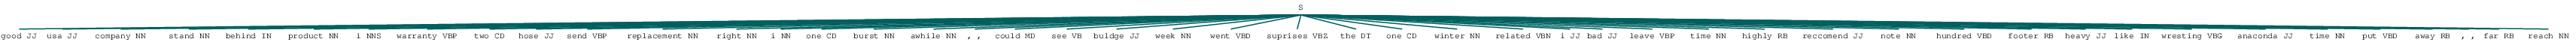

In [7]:
nltk.ne_chunk(a)

### Parts of Speech tagging to words by importing library of StanfordPOSTagger

In [1]:
from nltk.tag.stanford import StanfordPOSTagger
from nltk.tag import StanfordNERTagger
from nltk.parse.stanford import StanfordParser
st = StanfordPOSTagger('english-bidirectional-distsim.tagger')
st.tag('What is the airspeed of an unladen swallow ?'.split())

c:\users\naga kiran\appdata\local\programs\python\python36\lib\site-packages\nltk-3.2.5-py3.6.egg\nltk\tag\stanford.py:149: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordPOSTagger, self).__init__(*args, **kwargs)


[('What', 'WP'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('airspeed', 'NN'),
 ('of', 'IN'),
 ('an', 'DT'),
 ('unladen', 'JJ'),
 ('swallow', 'VB'),
 ('?', '.')]

### Named Entity tagging to words by importing library of StanfordPOSTagger

In [2]:
st = StanfordNERTagger('english.all.3class.distsim.crf.ser.gz')
st.tag('Rami Eid is studying at Stony Brook University in NY'.split())

c:\users\naga kiran\appdata\local\programs\python\python36\lib\site-packages\nltk-3.2.5-py3.6.egg\nltk\tag\stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


[('Rami', 'PERSON'),
 ('Eid', 'PERSON'),
 ('is', 'O'),
 ('studying', 'O'),
 ('at', 'O'),
 ('Stony', 'ORGANIZATION'),
 ('Brook', 'ORGANIZATION'),
 ('University', 'ORGANIZATION'),
 ('in', 'O'),
 ('NY', 'O')]